In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

# 1. Reading Raw csv files of both Business as well as Economy class: 

In [2]:
df_Business=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\capstone project\\Flight CAPSTONE PROJECT\\business.csv")

In [3]:
df_Economy=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\capstone project\\Flight CAPSTONE PROJECT\\economy.csv")

In [4]:
df_Business.shape

(93487, 11)

In [5]:
df_Economy.shape

(206774, 11)

In [6]:
df_Business.insert(loc=7,column = 'Class',value='Business')

In [7]:
df_Economy.insert(loc=7,column = 'Class',value='Economy')

In [8]:
df_Business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,Business,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,Business,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


# 2. Concatinating Business as well as Econonmy datasets:

In [9]:
df_full=pd.concat([df_Economy,df_Business]) 

In [10]:
df_full.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"
93486,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585"


In [11]:
df_full.shape

(300261, 12)

# 3. Data Manipulation:

In [12]:
df_full['route']=df_full['from'].astype(str)+'-'+df_full['to'].astype(str)

In [13]:
Route = {
'Delhi-Mumbai':'1148', 'Delhi-Bangalore':'1740', 'Delhi-Kolkata':'1305',
       'Delhi-Hyderabad':'1253', 'Delhi-Chennai':'1757', 'Mumbai-Delhi':'1137',
       'Mumbai-Bangalore':'845', 'Mumbai-Kolkata':'1652', 'Mumbai-Hyderabad':'617',
       'Mumbai-Chennai':'1031', 'Bangalore-Delhi':'1740', 'Bangalore-Mumbai':'833',
       'Bangalore-Kolkata':'970', 'Bangalore-Hyderabad':'453', 'Bangalore-Chennai':'289',
       'Kolkata-Delhi':'1305', 'Kolkata-Mumbai':'1652', 'Kolkata-Bangalore':'1560',
       'Kolkata-Hyderabad':'1180', 'Kolkata-Chennai':'1383', 'Hyderabad-Delhi':'1264',
       'Hyderabad-Mumbai':'621', 'Hyderabad-Bangalore':'453', 'Hyderabad-Kolkata':'1209',
       'Hyderabad-Chennai':'507', 'Chennai-Delhi':'1760', 'Chennai-Mumbai':'1031',
       'Chennai-Bangalore':'268', 'Chennai-Kolkata':'1383', 'Chennai-Hyderabad':'514'
}

In [14]:
df_full['Distance'] = df_full['route'].map(Route)

In [15]:
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,Economy,non-stop,21:05,Mumbai,"5,953",Delhi-Mumbai,1148
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,Economy,non-stop,08:40,Mumbai,"5,953",Delhi-Mumbai,1148
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,Economy,non-stop,06:35,Mumbai,"5,956",Delhi-Mumbai,1148
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,Economy,non-stop,12:35,Mumbai,"5,955",Delhi-Mumbai,1148
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,Economy,non-stop,11:10,Mumbai,"5,955",Delhi-Mumbai,1148


In [16]:
df_full['Distance']=df_full['Distance'].astype(int)

# 4. Data Cleaning:

In [17]:
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,Economy,non-stop,21:05,Mumbai,"5,953",Delhi-Mumbai,1148
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,Economy,non-stop,08:40,Mumbai,"5,953",Delhi-Mumbai,1148
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,Economy,non-stop,06:35,Mumbai,"5,956",Delhi-Mumbai,1148
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,Economy,non-stop,12:35,Mumbai,"5,955",Delhi-Mumbai,1148
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,Economy,non-stop,11:10,Mumbai,"5,955",Delhi-Mumbai,1148


In [18]:
df_full['price']=df_full['price'].str.replace(',','')

In [19]:
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,Economy,non-stop,21:05,Mumbai,5953,Delhi-Mumbai,1148
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,Economy,non-stop,08:40,Mumbai,5953,Delhi-Mumbai,1148
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,Economy,non-stop,06:35,Mumbai,5956,Delhi-Mumbai,1148
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,Economy,non-stop,12:35,Mumbai,5955,Delhi-Mumbai,1148
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,Economy,non-stop,11:10,Mumbai,5955,Delhi-Mumbai,1148


In [20]:
df_full['stop']=df_full['stop'].str.split('\n').str[0]

In [21]:
df_full['stop'].unique()

array(['non-stop ', '1-stop', '2+-stop'], dtype=object)

In [22]:
#Again manipulating the stop column:
df_full['stop']=df_full['stop'].replace('2+-stop','2-stop')

In [23]:
df_full['stop']=df_full['stop'].replace('non-stop','0-stop')

In [24]:
df_full['stop'].unique()

array(['non-stop ', '1-stop', '2-stop'], dtype=object)

In [25]:
df_full['stop'] = df_full['stop'].str.split('-').str[0]

In [26]:
df_full['stop'].unique()

array(['non', '1', '2'], dtype=object)

In [27]:
df_full['stop']=df_full['stop'].str.replace('non','0')

In [28]:
df_full['stop'].unique()

array(['0', '1', '2'], dtype=object)

In [29]:
#Manipulating the time_taken column:
df_full['time_taken']=df_full['time_taken'].str.replace(' ','.')
df_full['time_taken']=df_full['time_taken'].str.replace('h','')
df_full['time_taken']=df_full['time_taken'].str.replace('m','')

In [30]:
df_full['time_taken']=df_full['time_taken'].str.replace('1.01.','1.01')
df_full['time_taken']=df_full['time_taken'].str.replace('1.02.','1.02')
df_full['time_taken']=df_full['time_taken'].str.replace('1.03.','1.03')

In [31]:
#Changing dtype of time_taken to float:
df_full['time_taken']=df_full['time_taken'].astype(float)

In [32]:
df_full.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,2.10,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,1148
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,2.20,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,1148
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,2.10,Economy,0,06:35,Mumbai,5956,Delhi-Mumbai,1148
3,11-02-2022,Vistara,UK,995,10:20,Delhi,2.15,Economy,0,12:35,Mumbai,5955,Delhi-Mumbai,1148
4,11-02-2022,Vistara,UK,963,08:50,Delhi,2.20,Economy,0,11:10,Mumbai,5955,Delhi-Mumbai,1148


In [33]:
flight_cd=df_full['ch_code'].astype(str)+'-'+df_full['num_code'].astype(str)

In [34]:
df_full.insert(loc=3,column = 'Flight_code',value=flight_cd)

In [35]:
df_full.head()

,date,airline,ch_code,Flight_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,SpiceJet,SG,SG-8709,8709,18:55,Delhi,2.10,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,1148
1,11-02-2022,SpiceJet,SG,SG-8157,8157,06:20,Delhi,2.20,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,1148
2,11-02-2022,AirAsia,I5,I5-764,764,04:25,Delhi,2.10,Economy,0,06:35,Mumbai,5956,Delhi-Mumbai,1148
3,11-02-2022,Vistara,UK,UK-995,995,10:20,Delhi,2.15,Economy,0,12:35,Mumbai,5955,Delhi-Mumbai,1148
4,11-02-2022,Vistara,UK,UK-963,963,08:50,Delhi,2.20,Economy,0,11:10,Mumbai,5955,Delhi-Mumbai,1148


In [36]:
df_full.drop(['ch_code','num_code'],axis=1,inplace=True)

In [37]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,2.10,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,1148
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,2.20,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,1148
2,11-02-2022,AirAsia,I5-764,04:25,Delhi,2.10,Economy,0,06:35,Mumbai,5956,Delhi-Mumbai,1148
3,11-02-2022,Vistara,UK-995,10:20,Delhi,2.15,Economy,0,12:35,Mumbai,5955,Delhi-Mumbai,1148
4,11-02-2022,Vistara,UK-963,08:50,Delhi,2.20,Economy,0,11:10,Mumbai,5955,Delhi-Mumbai,1148


In [38]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         300261 non-null  object 
 1   airline      300261 non-null  object 
 2   Flight_code  300261 non-null  object 
 3   dep_time     300261 non-null  object 
 4   from         300261 non-null  object 
 5   time_taken   300261 non-null  float64
 6   Class        300261 non-null  object 
 7   stop         300261 non-null  object 
 8   arr_time     300261 non-null  object 
 9   to           300261 non-null  object 
 10  price        300261 non-null  object 
 11  route        300261 non-null  object 
 12  Distance     300261 non-null  int32  
dtypes: float64(1), int32(1), object(11)
memory usage: 30.9+ MB


In [39]:
#Here Target variable price is numerical in nature.Thus its dtype has to be converted into int:

In [40]:
df_full['price']=df_full['price'].astype(int)

In [41]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         300261 non-null  object 
 1   airline      300261 non-null  object 
 2   Flight_code  300261 non-null  object 
 3   dep_time     300261 non-null  object 
 4   from         300261 non-null  object 
 5   time_taken   300261 non-null  float64
 6   Class        300261 non-null  object 
 7   stop         300261 non-null  object 
 8   arr_time     300261 non-null  object 
 9   to           300261 non-null  object 
 10  price        300261 non-null  int32  
 11  route        300261 non-null  object 
 12  Distance     300261 non-null  int32  
dtypes: float64(1), int32(2), object(10)
memory usage: 29.8+ MB


In [42]:
df_full.describe(include='object')

,date,airline,Flight_code,dep_time,from,Class,stop,arr_time,to,route
count,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,1569,251,6,2,3,266,6,30
top,07-03-2022,Vistara,UK-706,07:00,Delhi,Economy,1,19:55,Mumbai,Delhi-Mumbai
freq,6633,127859,3235,8760,61345,206774,250929,9194,59109,15291


In [43]:
df_full.describe(include='int')

,price,Distance
count,300261.000000,300261.000000
mean,20883.717666,1150.039982
std,22695.911266,441.498572
min,1105.000000,268.000000
25%,4783.000000,833.000000
50%,7425.000000,1180.000000
75%,42521.000000,1560.000000
max,123071.000000,1760.000000


# Univariate analysis:

<AxesSubplot:xlabel='price', ylabel='Density'>

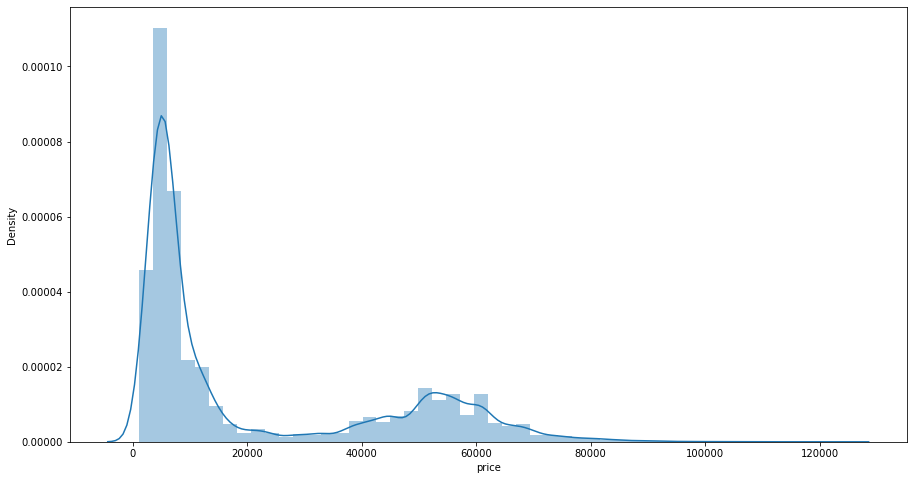

In [44]:
plt.figure(figsize=(15,8))
sns.distplot(df_full['price'],kde=True)

In [45]:
df_full['price'].skew()

1.0618915252479717

In [46]:
#As shown in the above distplot,the target variable seems to be highly right skewed in nature.

<AxesSubplot:xlabel='Distance', ylabel='Density'>

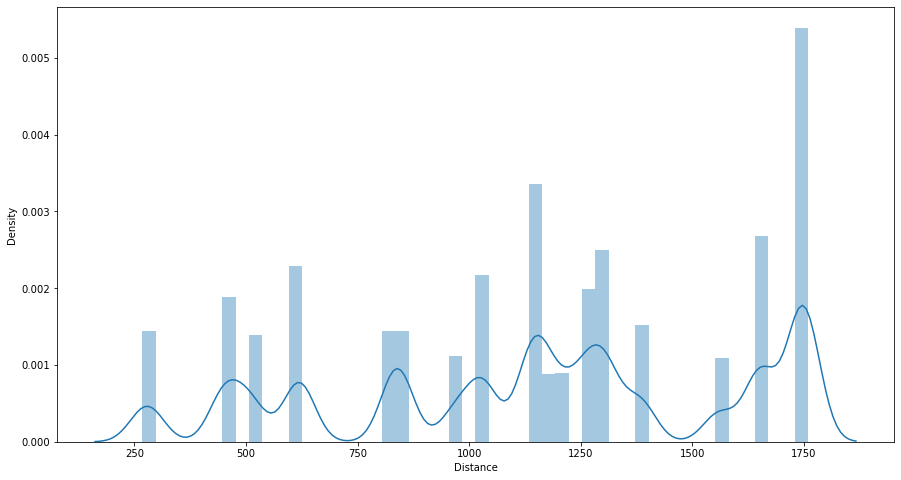

In [47]:
plt.figure(figsize=(15,8))
sns.distplot(df_full['Distance'],kde=True)

In [48]:
df_full['Distance'].skew()

-0.2765216222455745

In [49]:
#The skewness value for Distance column is in range of -0.5 to 0.5, Hence it is normally skewed and close to normal.

In [50]:
df_full_cat=df_full[['airline','from','to','Class','stop']]

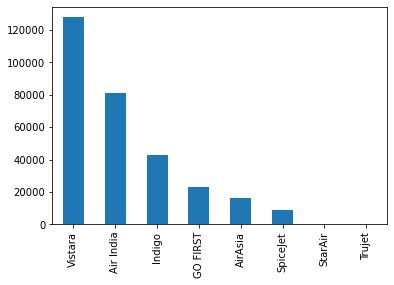

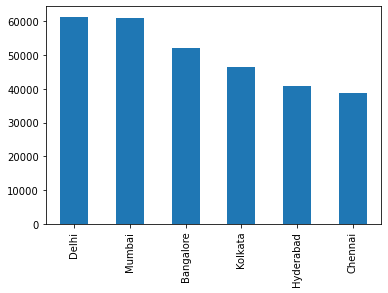

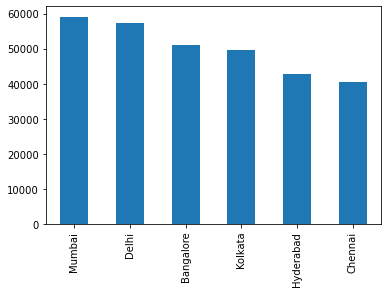

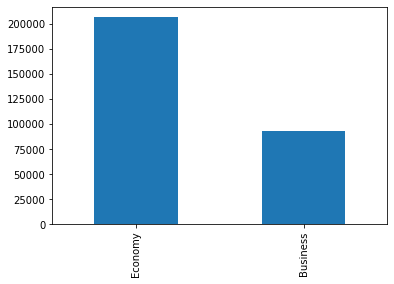

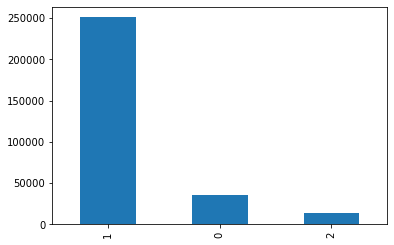

In [51]:
for i in df_full_cat.columns:
    df_full[i].value_counts().plot(kind='bar')
    plt.show()

#Inferences:
1)The number of flights for vistara airlines are the highest among all.
2)Flights running from Delhi as well as Mumbai airpost are largest in number while chennai being the lowest.
3)Flights reaching Mumbai airport are largest in number while in chennai flights arriving are the lowest.
4)Flights with economy classes are larger in number.
5)Majority of flights are having single stop.

# Bivariate analysis:

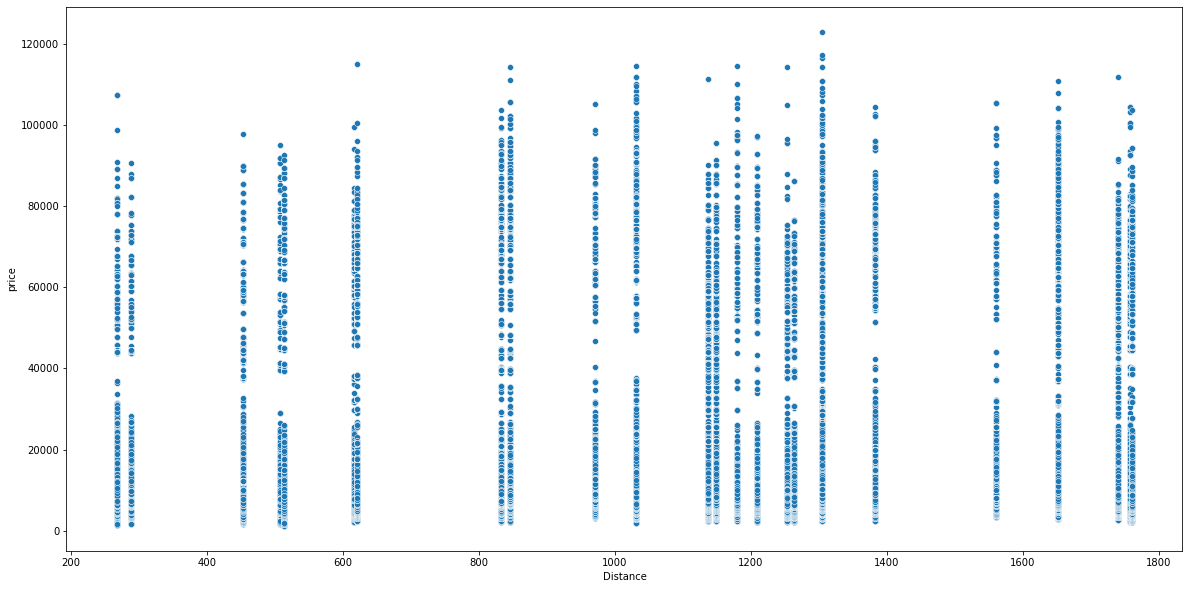

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_full,x='Distance',y='price')
plt.show()

In [53]:
#For the distances ranging between 1200 to 1400 kms. Flight ticket prices seems to be the highest.

<function matplotlib.pyplot.show(close=None, block=None)>

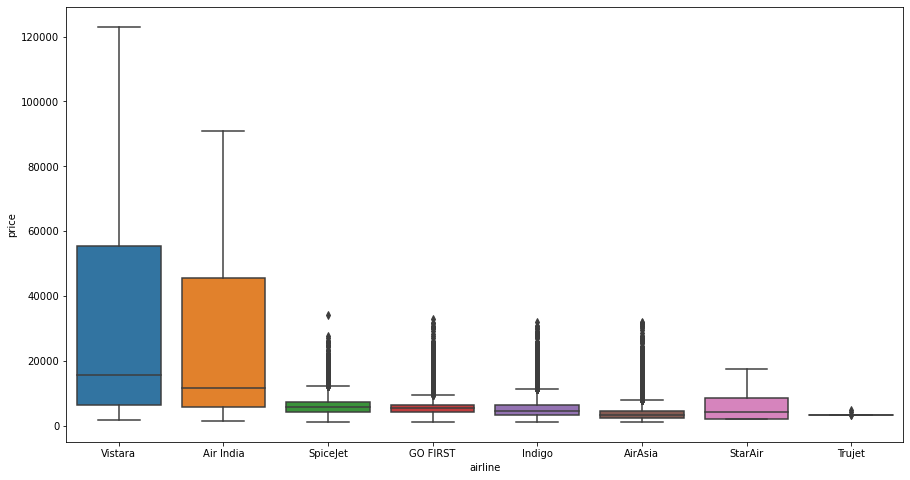

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='airline')
plt.show

In [55]:
#From above boxplot,we can say that ticket price for vistara airways is most expensive.

<function matplotlib.pyplot.show(close=None, block=None)>

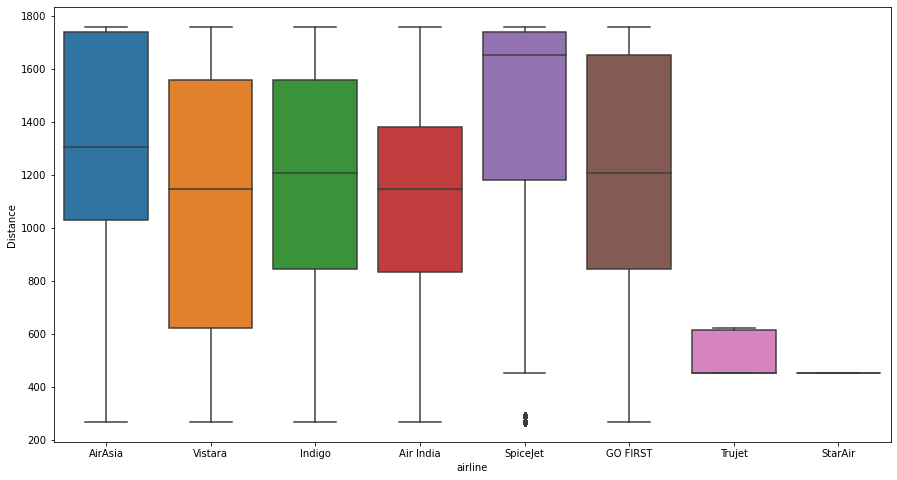

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('Distance',ascending=False),y='Distance',x='airline')
plt.show

In [57]:
#We can infer that Vistara airways are covering the wide range of sources and destinations.
#While the farther destinations are being covered by both AirAsia and SpiceJet airways. 

<function matplotlib.pyplot.show(close=None, block=None)>

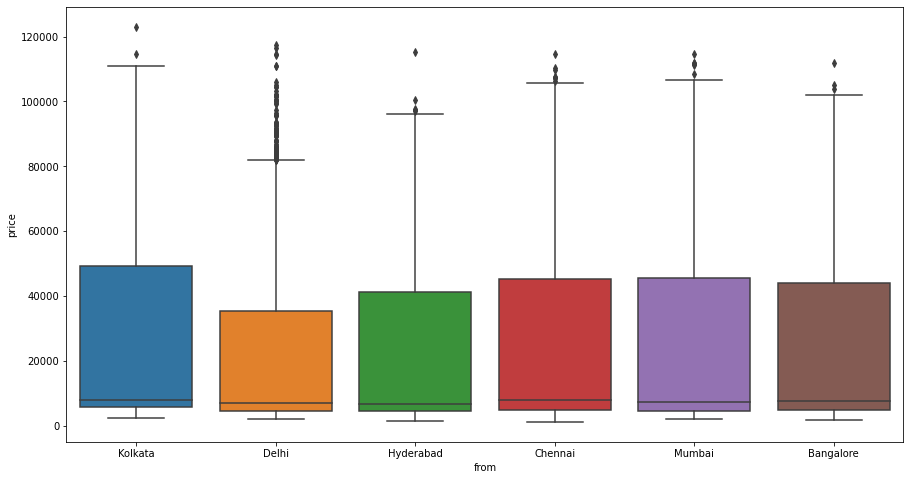

In [58]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='from')
plt.show

In [59]:
#From above boxplot,we can say that ticket price is most expensive from Kolkata.

<function matplotlib.pyplot.show(close=None, block=None)>

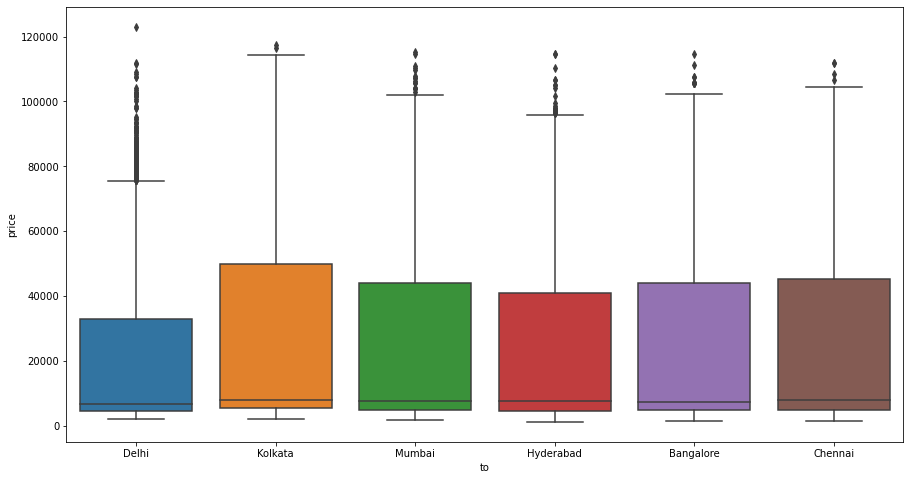

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='to')
plt.show

In [61]:
#From above boxplot,we can say that ticket price is most expensive for the flights heading to Delhi.

<function matplotlib.pyplot.show(close=None, block=None)>

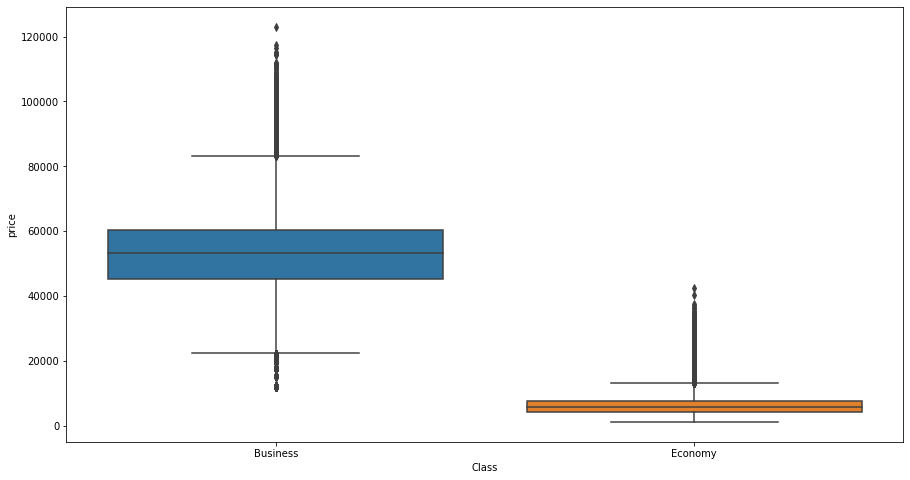

In [62]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='Class')
plt.show

In [63]:
#Flight tickets for business class is most expensive.

<function matplotlib.pyplot.show(close=None, block=None)>

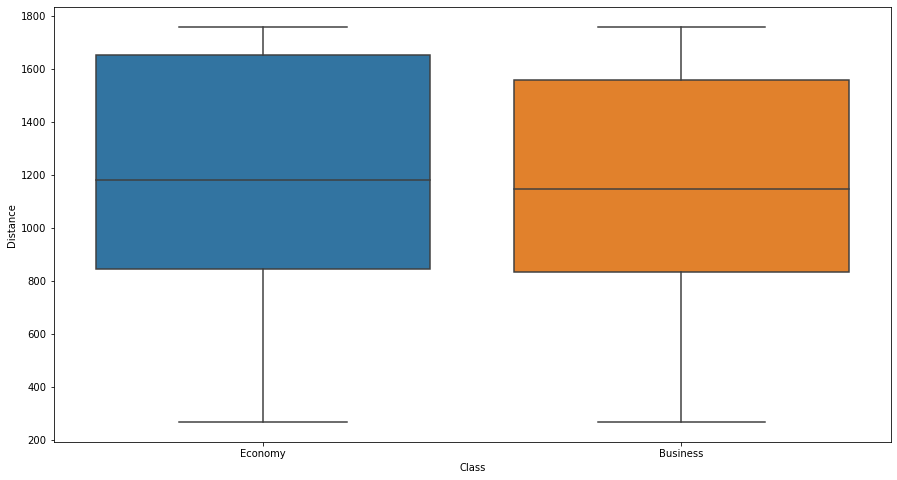

In [64]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('Distance',ascending=False),y='Distance',x='Class')
plt.show

In [65]:
#Economy class flights are generally covering longer destinations.

<function matplotlib.pyplot.show(close=None, block=None)>

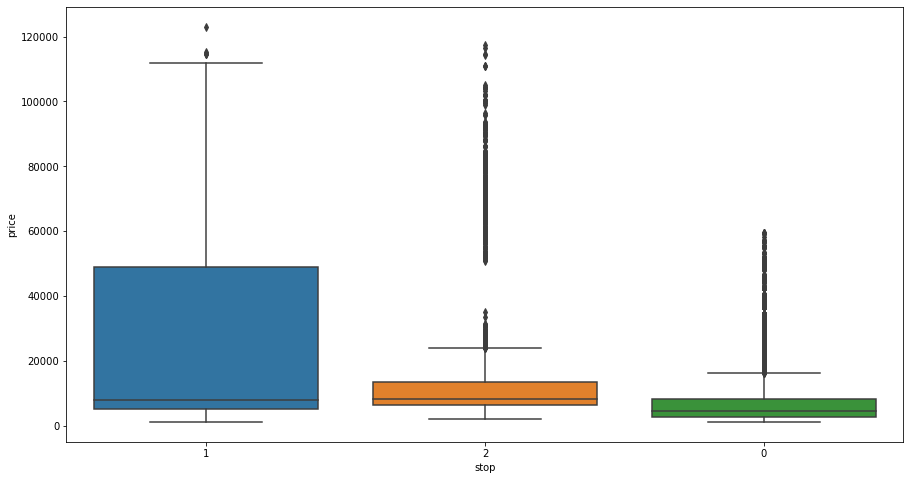

In [66]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='stop')
plt.show

In [67]:
#Ticket prices are most expensive when there are only single stop.

<function matplotlib.pyplot.show(close=None, block=None)>

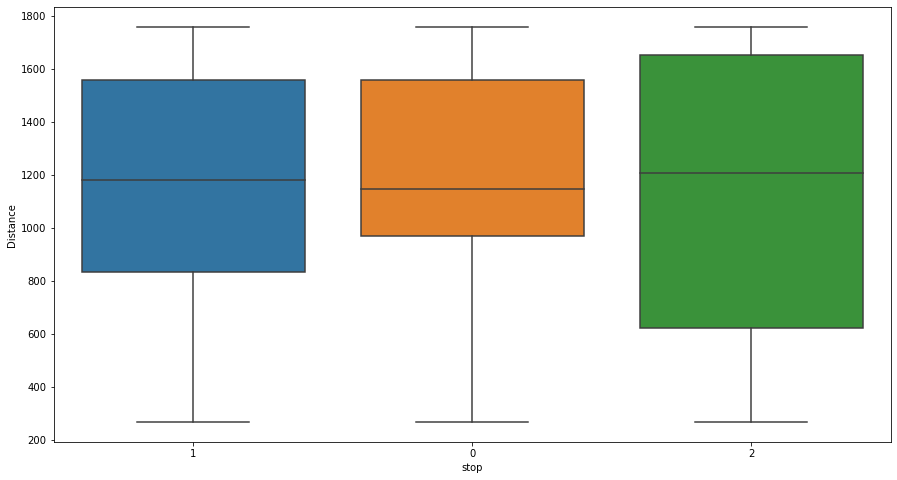

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('Distance',ascending=False),y='Distance',x='stop')
plt.show

In [69]:
#Gerenally the flights having 2 stops are covering farther distances.

In [70]:
pd.crosstab(df_full['airline'],df_full['route'])

route,Bangalore-Chennai,Bangalore-Delhi,Bangalore-Hyderabad,Bangalore-Kolkata,Bangalore-Mumbai,Chennai-Bangalore,Chennai-Delhi,Chennai-Hyderabad,Chennai-Kolkata,Chennai-Mumbai,...,Kolkata-Bangalore,Kolkata-Chennai,Kolkata-Delhi,Kolkata-Hyderabad,Kolkata-Mumbai,Mumbai-Bangalore,Mumbai-Chennai,Mumbai-Delhi,Mumbai-Hyderabad,Mumbai-Kolkata
airline,,,,,,,,,,,,,,,,,,,,,
Air India,1610,2633,2228,2026,3555,1638,1845,1432,1869,3128,...,1959,2096,3037,2054,3254,3632,3192,4650,3425,3478
AirAsia,138,1558,192,848,628,138,707,126,307,220,...,898,304,827,298,502,530,222,745,216,463
GO FIRST,369,1446,474,874,1338,382,576,38,172,121,...,801,123,1154,366,1146,1383,149,1684,1202,1150
Indigo,282,1961,1318,1637,1882,348,1747,1404,1541,1706,...,1487,1155,1865,1684,1105,1859,1787,1465,705,1690
SpiceJet,58,735,31,274,157,55,763,51,145,205,...,275,175,441,149,907,142,166,453,0,973
StarAir,0,0,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trujet,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
Vistara,3953,5423,4686,4370,5380,3932,4145,3052,2949,3958,...,4404,2800,3182,3346,4553,5339,4614,5812,4922,4848


In [71]:
#We can see the max and min. number of flights corresponding to various airlines from particular 
#source to desired destination

# Multivariate Analysis:

In [72]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,2.10,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,1148
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,2.20,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,1148
2,11-02-2022,AirAsia,I5-764,04:25,Delhi,2.10,Economy,0,06:35,Mumbai,5956,Delhi-Mumbai,1148
3,11-02-2022,Vistara,UK-995,10:20,Delhi,2.15,Economy,0,12:35,Mumbai,5955,Delhi-Mumbai,1148
4,11-02-2022,Vistara,UK-963,08:50,Delhi,2.20,Economy,0,11:10,Mumbai,5955,Delhi-Mumbai,1148


<AxesSubplot:>

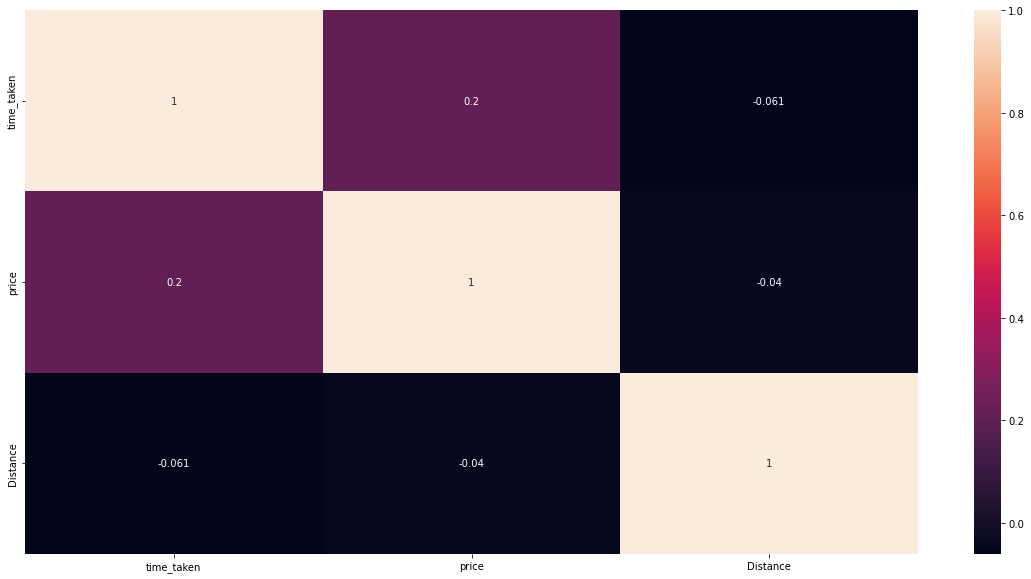

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_full.corr(),annot=True)

In [74]:
#No strong correlation found.

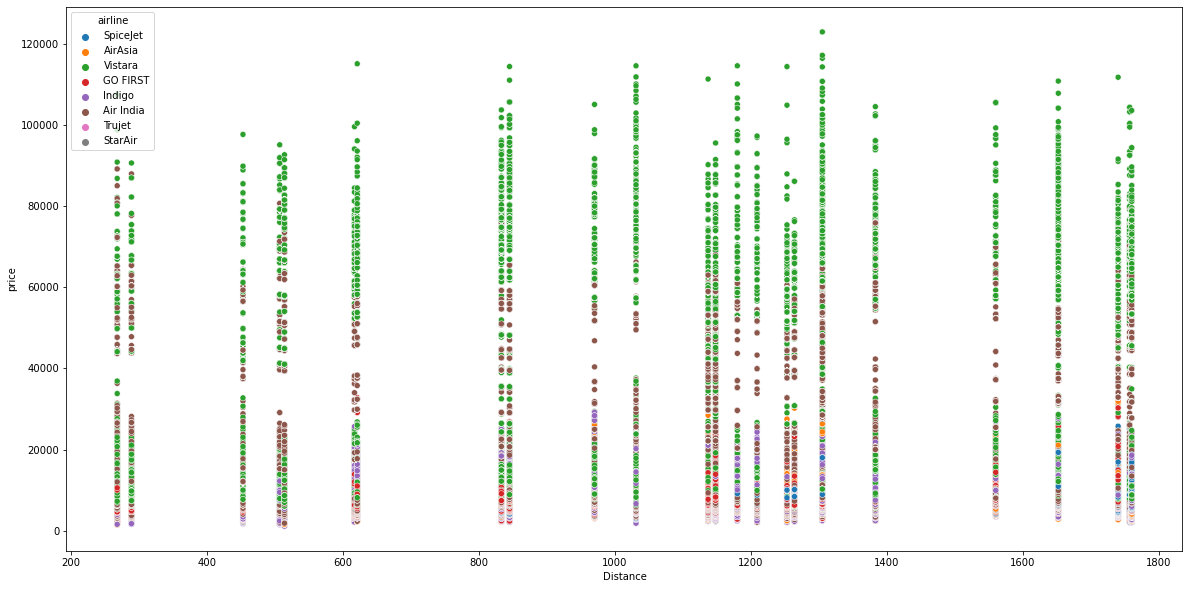

In [75]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_full,x='Distance',y='price',hue='airline')
plt.show()

In [76]:
#We can see the maximum number of flights of vistara airways through various routes covering major distances.

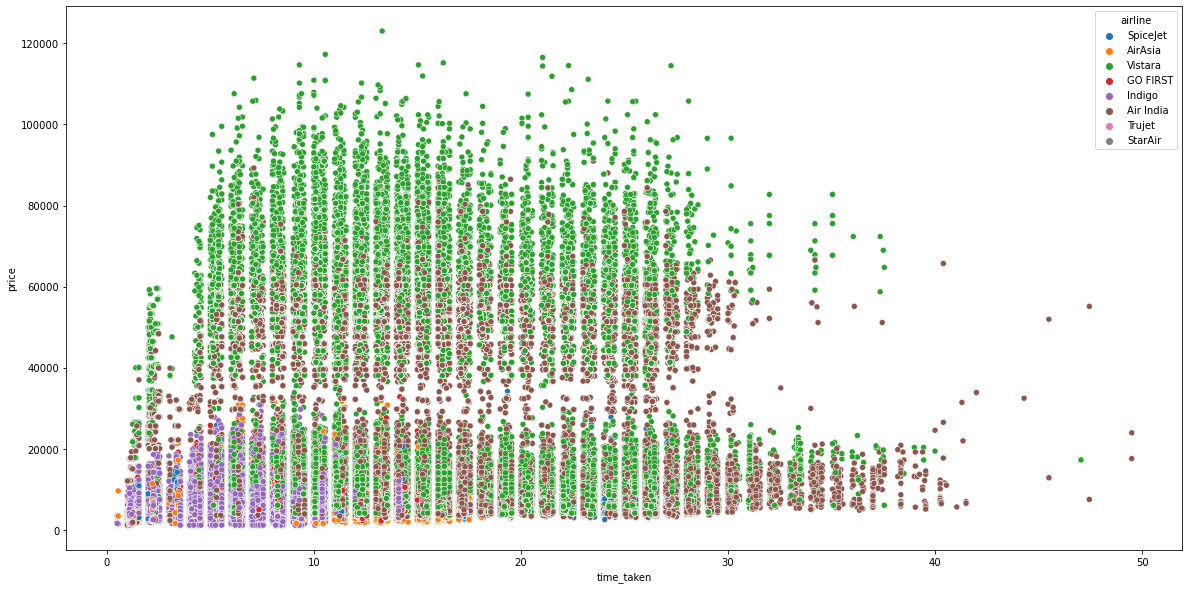

In [77]:
plt.figure(figsize=(20,10))
sns.scatterplot(df_full['time_taken'],df_full['price'],hue=df_full['airline'])
plt.show()

In [78]:
#We can see from the above scatter plot that there are many green dots which are related to Vistara,clearly signifies that
#the airline is most expensive.
#Time taken by Air India and Vistara seems to be the largest among all.

In [79]:
#Let drop time taken column as of now:
df_full.drop(['time_taken'],axis=1,inplace=True)

# Missing Value:

In [80]:
df_full.isnull().sum()

date           0
airline        0
Flight_code    0
dep_time       0
from           0
Class          0
stop           0
arr_time       0
to             0
price          0
route          0
Distance       0
dtype: int64

In [81]:
#Hence there are no missing values present.

# Feature Engineering:

In [82]:
df_full['Day']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.day
df_full['Week']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.week
df_full['Month']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.month

In [83]:
df_full.head()

,date,airline,Flight_code,dep_time,from,Class,stop,arr_time,to,price,route,Distance,Day,Week,Month
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,1148,11,6,2
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,1148,11,6,2
2,11-02-2022,AirAsia,I5-764,04:25,Delhi,Economy,0,06:35,Mumbai,5956,Delhi-Mumbai,1148,11,6,2
3,11-02-2022,Vistara,UK-995,10:20,Delhi,Economy,0,12:35,Mumbai,5955,Delhi-Mumbai,1148,11,6,2
4,11-02-2022,Vistara,UK-963,08:50,Delhi,Economy,0,11:10,Mumbai,5955,Delhi-Mumbai,1148,11,6,2


In [84]:
df_full["Dep_hour"] = pd.to_datetime(df_full["dep_time"]).dt.hour
df_full["Dep_minute"] = pd.to_datetime(df_full["dep_time"]).dt.minute

In [85]:
df_full["Arr_hour"] = pd.to_datetime(df_full["arr_time"]).dt.hour
df_full["Arr_minute"] = pd.to_datetime(df_full["arr_time"]).dt.minute

In [86]:
#Now dropping all the redundant columns:
df_full.drop(['date'],axis=1,inplace=True)

In [87]:
df_full.drop(['Flight_code'],axis=1,inplace=True)
df_full.drop(['dep_time'],axis=1,inplace=True)
df_full.drop(['arr_time'],axis=1,inplace=True)

In [88]:
df_full.head()

,airline,from,Class,stop,to,price,route,Distance,Day,Week,Month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,SpiceJet,Delhi,Economy,0,Mumbai,5953,Delhi-Mumbai,1148,11,6,2,18,55,21,5
1,SpiceJet,Delhi,Economy,0,Mumbai,5953,Delhi-Mumbai,1148,11,6,2,6,20,8,40
2,AirAsia,Delhi,Economy,0,Mumbai,5956,Delhi-Mumbai,1148,11,6,2,4,25,6,35
3,Vistara,Delhi,Economy,0,Mumbai,5955,Delhi-Mumbai,1148,11,6,2,10,20,12,35
4,Vistara,Delhi,Economy,0,Mumbai,5955,Delhi-Mumbai,1148,11,6,2,8,50,11,10


In [89]:
df_full.dtypes

airline       object
from          object
Class         object
stop          object
to            object
price          int32
route         object
Distance       int32
Day            int64
Week           int64
Month          int64
Dep_hour       int64
Dep_minute     int64
Arr_hour       int64
Arr_minute     int64
dtype: object

<AxesSubplot:xlabel='Week', ylabel='price'>

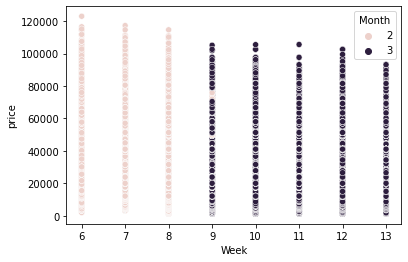

In [90]:
sns.scatterplot(data=df_full,x='Week',y='price',hue='Month')

In [91]:
df_full_num=df_full.select_dtypes(exclude='object')

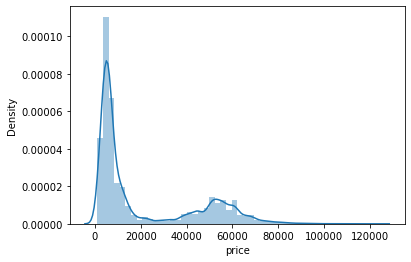

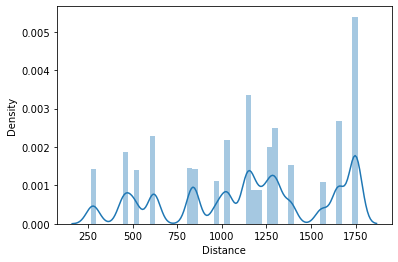

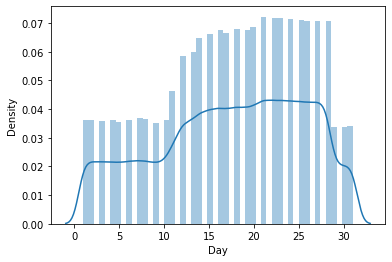

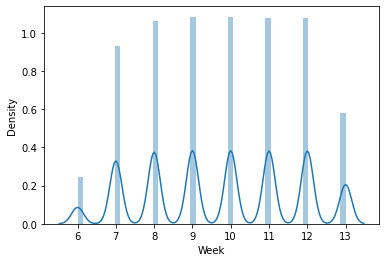

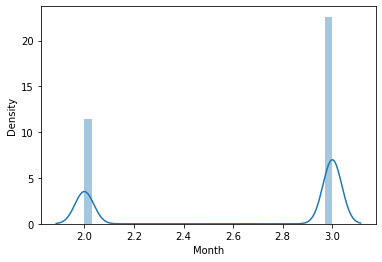

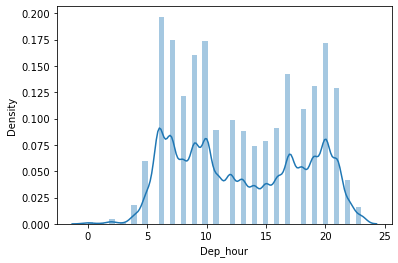

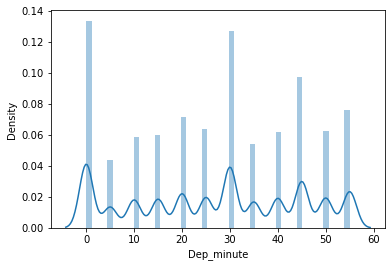

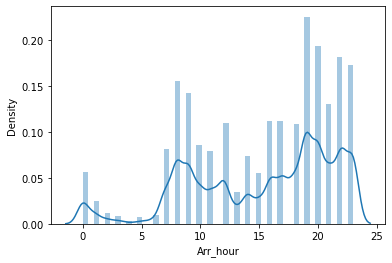

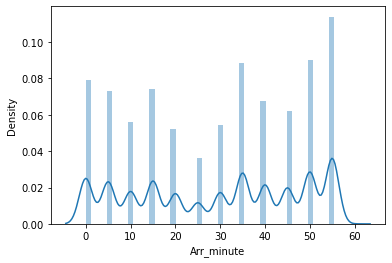

In [92]:
for i in df_full_num.columns:
    sns.distplot(df_full[i])
    plt.show()

In [93]:
for i in df_full_num.columns:
    print(df_full[i].skew())
    

1.0618915252479717
-0.2765216222455745
-0.30332581225676203
-0.028551942599299267
-0.6991453729571872
0.10644358168784722
-0.07229017235901142
-0.6183183336109602
-0.14540098364248513


In [94]:
df_full_num.columns

Index(['price', 'Distance', 'Day', 'Week', 'Month', 'Dep_hour', 'Dep_minute',
       'Arr_hour', 'Arr_minute'],
      dtype='object')

In [95]:
#Target variable price is highly positive skewed.
#Month column is slightly negatrively skewed.
#Arr_hour is slightly negatively skewed.
#So we will do feature Transformations for the above columns.

<AxesSubplot:xlabel='Month', ylabel='Density'>

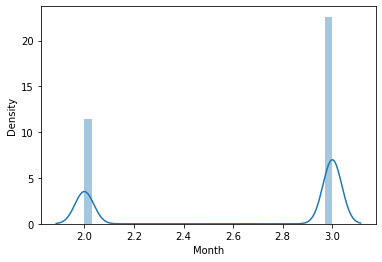

In [96]:
sns.distplot(df_full['Month'])

<AxesSubplot:xlabel='Arr_hour', ylabel='Density'>

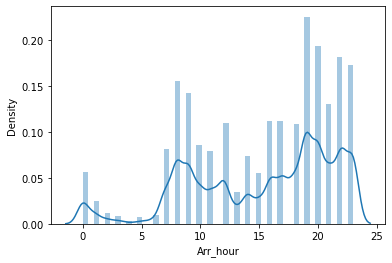

In [97]:
sns.distplot(df_full['Arr_hour'])

In [98]:
df_full.head()

,airline,from,Class,stop,to,price,route,Distance,Day,Week,Month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,SpiceJet,Delhi,Economy,0,Mumbai,5953,Delhi-Mumbai,1148,11,6,2,18,55,21,5
1,SpiceJet,Delhi,Economy,0,Mumbai,5953,Delhi-Mumbai,1148,11,6,2,6,20,8,40
2,AirAsia,Delhi,Economy,0,Mumbai,5956,Delhi-Mumbai,1148,11,6,2,4,25,6,35
3,Vistara,Delhi,Economy,0,Mumbai,5955,Delhi-Mumbai,1148,11,6,2,10,20,12,35
4,Vistara,Delhi,Economy,0,Mumbai,5955,Delhi-Mumbai,1148,11,6,2,8,50,11,10


# Checking Standard deviation of Features:

In [99]:
df_full.std()

price         22695.911266
Distance        441.498572
Day               8.074005
Week              1.968621
Month             0.471993
Dep_hour          5.363186
Dep_minute       17.761449
Arr_hour          6.050231
Arr_minute       18.562370
dtype: float64

In [100]:
#As the standard deviation of Month column is close to 0, so we can drop it.

In [101]:
df_full.drop(['Month'],axis=1,inplace=True)

In [102]:
df_full.drop(['route'],axis=1,inplace=True)

In [103]:
df_full.columns

Index(['airline', 'from', 'Class', 'stop', 'to', 'price', 'Distance', 'Day',
       'Week', 'Dep_hour', 'Dep_minute', 'Arr_hour', 'Arr_minute'],
      dtype='object')

# Encoding and Scaling:

Split the dependent and independent variables.

In [104]:
df_full.head()

,airline,from,Class,stop,to,price,Distance,Day,Week,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,SpiceJet,Delhi,Economy,0,Mumbai,5953,1148,11,6,18,55,21,5
1,SpiceJet,Delhi,Economy,0,Mumbai,5953,1148,11,6,6,20,8,40
2,AirAsia,Delhi,Economy,0,Mumbai,5956,1148,11,6,4,25,6,35
3,Vistara,Delhi,Economy,0,Mumbai,5955,1148,11,6,10,20,12,35
4,Vistara,Delhi,Economy,0,Mumbai,5955,1148,11,6,8,50,11,10


In [105]:
df_full_target=df_full['price']
df_full_feature=df_full.drop('price',axis=1)

In [106]:
#Filter numerical and categorical variables.
df_full_num = df_full_feature.select_dtypes(include = [np.number])
df_full_cat = df_full_feature.select_dtypes(include = [np.object])

In [107]:
df_full_cat

,airline,from,Class,stop,to
0,SpiceJet,Delhi,Economy,0,Mumbai
1,SpiceJet,Delhi,Economy,0,Mumbai
2,AirAsia,Delhi,Economy,0,Mumbai
3,Vistara,Delhi,Economy,0,Mumbai
4,Vistara,Delhi,Economy,0,Mumbai
...,...,...,...,...,...
93482,Vistara,Chennai,Business,1,Hyderabad
93483,Vistara,Chennai,Business,1,Hyderabad
93484,Vistara,Chennai,Business,1,Hyderabad
93485,Vistara,Chennai,Business,1,Hyderabad


In [108]:
#Now we are encoding each categorical feature using dummy encoding.
dummy_var = pd.get_dummies(data = df_full_cat, drop_first = True)

In [109]:
dummy_var.head()

,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,Class_Economy,stop_1,stop_2,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1


In [110]:
#Now scaling the data using standard scaler:
from sklearn.preprocessing import StandardScaler

In [111]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_full_num)
df_full_num_scaled = pd.DataFrame(num_scaled, columns = df_full_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_full_target - df_full_target.mean()) / df_full_target.std()

In [112]:
dummy_var.reset_index(inplace=True)

In [113]:
df_full_num_scaled.reset_index(inplace = True)

In [114]:
X = pd.concat([df_full_num_scaled, dummy_var], axis = 1)

X.head()

,index,Distance,Day,Week,Dep_hour,Dep_minute,Arr_hour,Arr_minute,index,airline_AirAsia,...,from_Kolkata,from_Mumbai,Class_Economy,stop_1,stop_2,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0,-0.004621,-0.790764,-1.890363,0.935354,1.575307,0.952207,-1.319093,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,-0.004621,-0.790764,-1.890363,-1.302126,-0.395256,-1.196475,0.566445,1,0,...,0,0,1,0,0,0,0,0,0,1
2,2,-0.004621,-0.790764,-1.890363,-1.675039,-0.113747,-1.527041,0.297083,2,1,...,0,0,1,0,0,0,0,0,0,1
3,3,-0.004621,-0.790764,-1.890363,-0.556299,-0.395256,-0.535342,0.297083,3,0,...,0,0,1,0,0,0,0,0,0,1
4,4,-0.004621,-0.790764,-1.890363,-0.929212,1.293798,-0.700625,-1.049730,4,0,...,0,0,1,0,0,0,0,0,0,1


In [115]:
X.drop(['index'],axis=1,inplace=True)

In [116]:
X.head()

,Distance,Day,Week,Dep_hour,Dep_minute,Arr_hour,Arr_minute,airline_AirAsia,airline_GO FIRST,airline_Indigo,...,from_Kolkata,from_Mumbai,Class_Economy,stop_1,stop_2,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,-0.004621,-0.790764,-1.890363,0.935354,1.575307,0.952207,-1.319093,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,-0.004621,-0.790764,-1.890363,-1.302126,-0.395256,-1.196475,0.566445,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.004621,-0.790764,-1.890363,-1.675039,-0.113747,-1.527041,0.297083,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.004621,-0.790764,-1.890363,-0.556299,-0.395256,-0.535342,0.297083,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.004621,-0.790764,-1.890363,-0.929212,1.293798,-0.700625,-1.049730,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [117]:
y = (df_full_target - df_full_target.mean()) / df_full_target.std()

In [118]:
y

0       -0.657859
1       -0.657859
2       -0.657727
3       -0.657771
4       -0.657771
           ...   
93482    2.131718
93483    2.477155
93484    2.565012
93485    2.674547
93486    2.674547
Name: price, Length: 300261, dtype: float64

# Train-Test Split:

In [119]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [120]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [121]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (210182, 28)
y_train (210182,)
X_test (90079, 28)
y_test (90079,)


In [122]:
X_train.columns

Index(['const', 'Distance', 'Day', 'Week', 'Dep_hour', 'Dep_minute',
       'Arr_hour', 'Arr_minute', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'from_Chennai', 'from_Delhi',
       'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'Class_Economy',
       'stop_1', 'stop_2', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai'],
      dtype='object')

# Feature Selection:

In [123]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [124]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select =None)

# fit the RFE model on the training dataset using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Week', 'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'Class_Economy', 'stop_1', 'stop_2', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata'],
      dtype='object')


In [125]:
X_train.columns

Index(['const', 'Distance', 'Day', 'Week', 'Dep_hour', 'Dep_minute',
       'Arr_hour', 'Arr_minute', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'from_Chennai', 'from_Delhi',
       'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'Class_Economy',
       'stop_1', 'stop_2', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai'],
      dtype='object')

In [126]:
New_X_train = X_train[['Week', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'Class_Economy', 'stop_1', 'stop_2', 'to_Delhi',
       'to_Hyderabad', 'to_Kolkata']]

In [127]:
New_X_train.shape

(210182, 14)

In [128]:
New_X_test=X_test[['Week', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'Class_Economy', 'stop_1', 'stop_2', 'to_Delhi',
       'to_Hyderabad', 'to_Kolkata']]

In [129]:
New_X_test.shape

(90079, 14)

# Checking Multicollinearity before model building:

<AxesSubplot:>

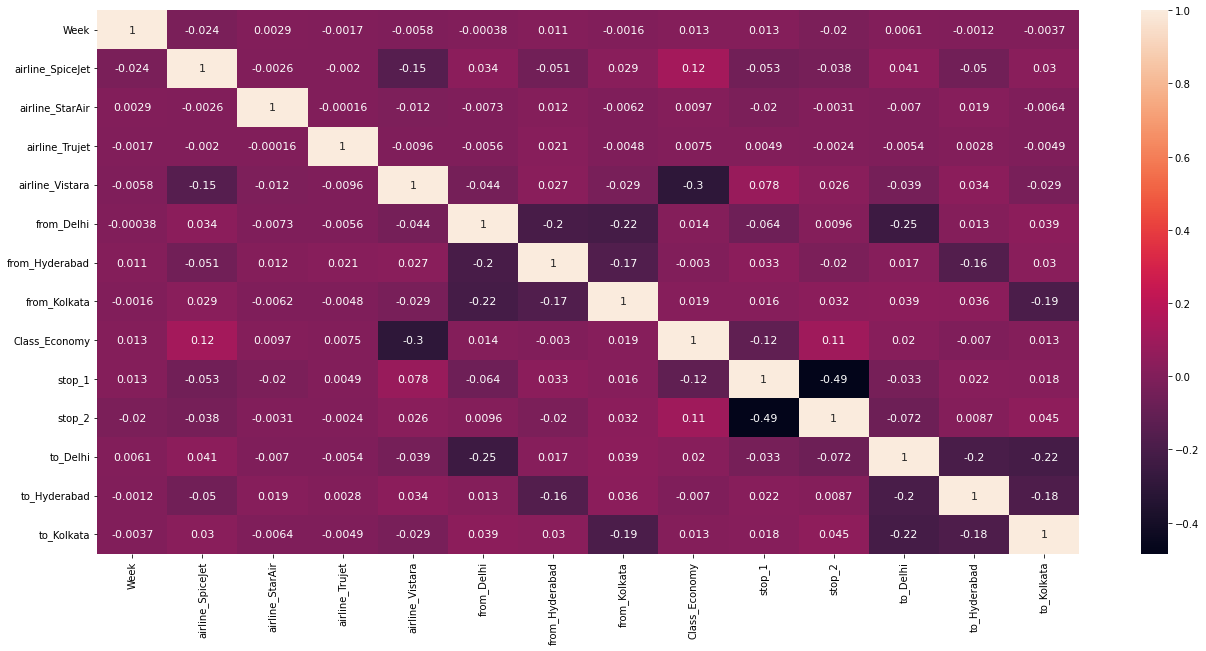

In [130]:
plt.figure(figsize = (22,10))
sns.heatmap(New_X_train.corr(), annot = True, annot_kws = {"size": 11})

<AxesSubplot:>

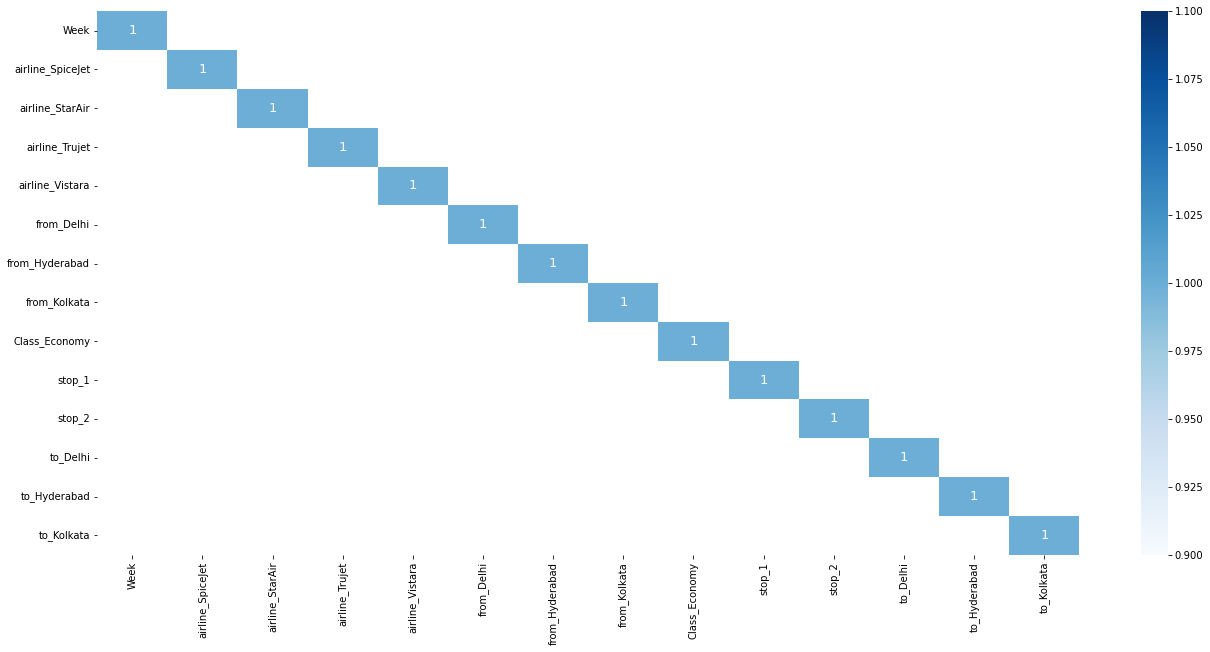

In [131]:
plt.figure(figsize = (22,10))
sns.heatmap(New_X_train.corr()[np.abs(New_X_train.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

Interpretation: The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark shade represent the strong positive correlation.

# Checking which features are multicollinear with the help of VIF technique:

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
df_full_feature_vif = New_X_train.select_dtypes(include=[np.number])

In [134]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_full_feature_vif.values, i) for i in range(df_full_feature_vif.shape[1])]
vif["Features"] = df_full_feature_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,4.127787,stop_1
1,2.782859,Class_Economy
2,1.776383,airline_Vistara
3,1.379212,from_Delhi
4,1.363547,to_Delhi
5,1.338087,to_Kolkata
6,1.315500,from_Kolkata
7,1.282335,to_Hyderabad
8,1.268457,from_Hyderabad
9,1.249177,stop_2


In [135]:
#From above table we can infer that the VIF for every feature seems lesser than 5. As a result of which there is the presence 
#of only moderate multicolinearity present. So we can ignore and move forward wirh model building.

# Building MLR Model using OLS Technique:

# Train-Test Split:

In [136]:
MLR_Model=sm.OLS(y_train.values.reshape(-1,1),New_X_train).fit()
print(MLR_Model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                          8.229e+04
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                        0.00
Time:                        09:41:16   Log-Likelihood:                     -1.0191e+05
No. Observations:              210182   AIC:                                  2.038e+05
Df Residuals:                  210168   BIC:                                  2.040e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Interpretation:
1)From the above build model we can see that Condition Number is 149,which implies that there is moderate multicollinearity
present.
2)The summary output shows that the value of the Durbin-Watson is approximately equal to 2,which means there is no-autocorrelation.
3)The p-value came from JB Test is less than 0.05,which shows that errors are not normal in nature.


# Checking for Linear Relationship between Dependent and Independent Variable:

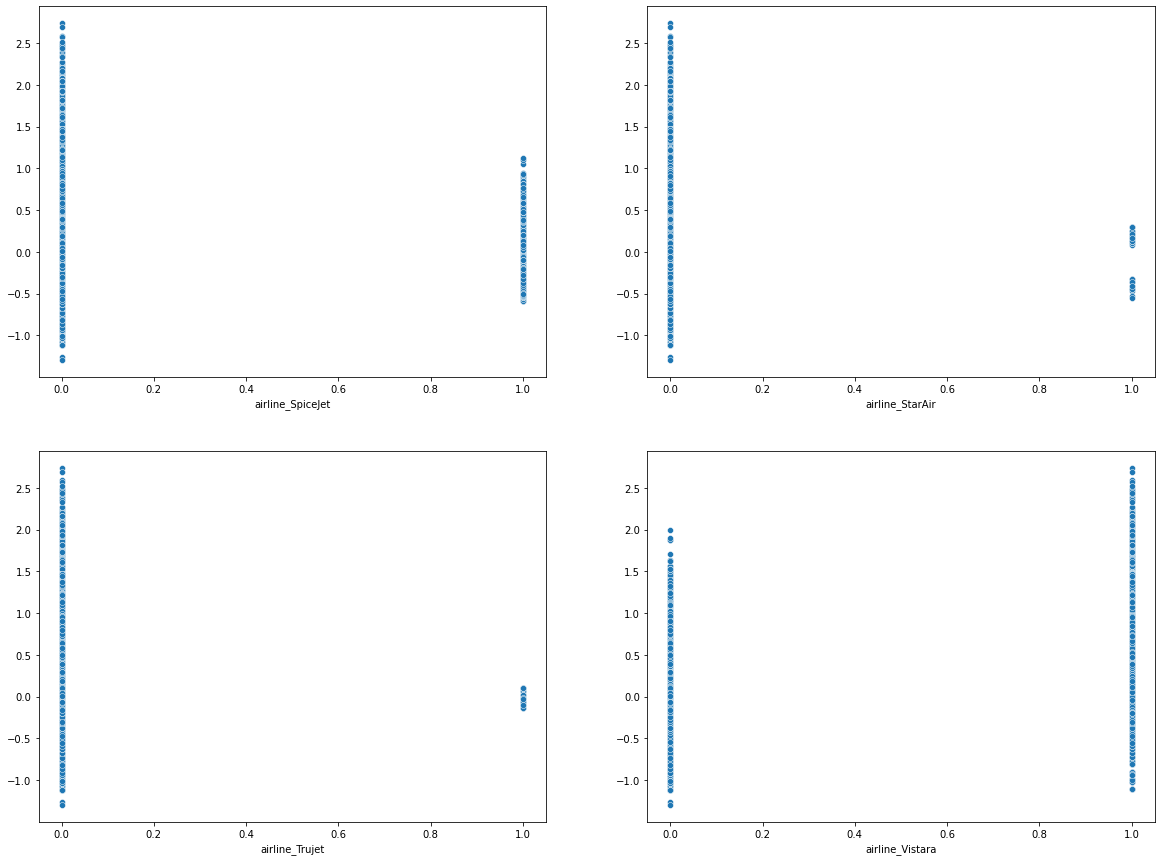

In [137]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))
for variable, subplot in zip(New_X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(New_X_train[variable], MLR_Model.resid , ax=subplot)

plt.show()

Interpretation: The above plots show specific pattern, implies that there is linearity present in the data.

# Checking for Heteroskedasticity:

In [138]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [139]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_Model.resid, MLR_Model.model.exog)
lzip(name, test[2:])

[('f-value', 3124.107958743567), ('p-value', 0.0)]

Interpretation: We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

# Checking for Normality in Residuals:

In [140]:
from scipy import stats
from scipy.stats import shapiro

In [141]:
#With the help of Shapiro-wilk test we are looking for normality in Residuals:
stat, p_value = shapiro(MLR_Model.resid)


print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9347174763679504
P-Value: 0.0


Interpretation: From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.

# Now Creating generalized functions to calculate various metrics for models:

Create a generalized function to calculate the RMSE for train and test set.

In [142]:
def get_train_rmse(model):
    train_pred = model.predict(New_X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [143]:
def get_test_rmse(model):
    test_pred = model.predict(New_X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

Create a generalized function to calculate the MAPE for test set.

In [144]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(New_X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [145]:
def get_score(model):
    r_sq = model.score(New_X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

Create a generalized function to create a dataframe containing the scores from all the models

In [146]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    
    global score_card

    
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

# Building a MLR model on a training dataset:

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [148]:
# initiate linear regression model
linreg = LinearRegression()


MLR_model = linreg.fit(New_X_train, y_train)


MLR_model.score(New_X_train, y_train)

0.9103323024836564

In [149]:
print('RMSE on train set: ', get_train_rmse(MLR_model))
print('RMSE on test set: ', get_test_rmse(MLR_model))
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.2996
RMSE on test set:  0.2992
Difference between RMSE on train and test set:  0.00039999999999995595


Interpretation: RMSE on the training set is 0.2973, while on the test set it is 0.2967. We can see that there is very minimal difference in the RMSE of the train and the test set. This implies that our model is normal-fitted.

In [150]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.91032,0.2992,87.548813


# Gradient Descent

Build MLR model using SGD method.

In [151]:
from sklearn.linear_model import SGDRegressor

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(New_X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.2996
RMSE on test set: 0.2992


In [152]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769


# Regularization

# Ridge Regression

Build regression model using Ridge Regression for alpha = 1.

In [153]:
from sklearn.linear_model import Ridge

# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(New_X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.2992


Interpretation:After applying the ridge regression with alpha equal to one, we get 0.2992 as the RMSE value.

In [154]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.2992,87.548244


Build regression model using Ridge Regression for alpha = 2.

In [155]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(New_X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.2992


Interpretation: After applying the ridge regression with alpha equal to two, the RMSE value is same.

In [156]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.2992,87.548244
3,Ridge Regression (with alpha = 2),2,-,0.910332,0.910320,0.2992,87.547681


# Lasso Regression

In [157]:
from sklearn.linear_model import Lasso
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(New_X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.3132


In [158]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.2992,87.548244
3,Ridge Regression (with alpha = 2),2,-,0.910332,0.910320,0.2992,87.547681
4,Lasso Regression,0.01,-,0.901061,0.901048,0.3132,92.805618


# Elastic Net Regression

In [159]:
from sklearn.linear_model import ElasticNet
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(New_X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.421


In [160]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.2992,87.548244
3,Ridge Regression (with alpha = 2),2,-,0.910332,0.910320,0.2992,87.547681
4,Lasso Regression,0.01,-,0.901061,0.901048,0.3132,92.805618
5,Elastic Net Regression,0.1,0.01,0.822085,0.822061,0.4210,80.279503


# Grid Search CV

Find optimal value of alpha for Ridge Regression

In [161]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 0.2992


In [162]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.2992,87.548244
3,Ridge Regression (with alpha = 2),2,-,0.910332,0.910320,0.2992,87.547681
4,Lasso Regression,0.01,-,0.901061,0.901048,0.3132,92.805618
5,Elastic Net Regression,0.1,0.01,0.822085,0.822061,0.4210,80.279503
6,Ridge Regression (using GridSearchCV),0.1,-,0.910332,0.910320,0.2992,87.548756


Find optimal value of alpha for Lasso Regression

In [163]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-15} 

RMSE on test set: 0.2992


In [164]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.2992,87.548244
3,Ridge Regression (with alpha = 2),2,-,0.910332,0.910320,0.2992,87.547681
4,Lasso Regression,0.01,-,0.901061,0.901048,0.3132,92.805618
5,Elastic Net Regression,0.1,0.01,0.822085,0.822061,0.4210,80.279503
6,Ridge Regression (using GridSearchCV),0.1,-,0.910332,0.910320,0.2992,87.548756
7,Lasso Regression (using GridSearchCV),0.0,-,0.910332,0.910320,0.2992,87.548813


Find optimal value of alpha for Elastic Net Regression

In [165]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 

RMSE on test set: 0.2992


In [166]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.2992,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.2992,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.2992,87.548244
3,Ridge Regression (with alpha = 2),2,-,0.910332,0.910320,0.2992,87.547681
4,Lasso Regression,0.01,-,0.901061,0.901048,0.3132,92.805618
5,Elastic Net Regression,0.1,0.01,0.822085,0.822061,0.4210,80.279503
6,Ridge Regression (using GridSearchCV),0.1,-,0.910332,0.910320,0.2992,87.548756
7,Lasso Regression (using GridSearchCV),0.0,-,0.910332,0.910320,0.2992,87.548813
8,Elastic Net Regression (using GridSearchCV),0.0001,0.0001,0.910331,0.910319,0.2992,87.536547


Display the score card summary

In [167]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.910332,0.910320,0.299200,87.548813
1,Linear Regression (using SGD),-,-,0.910293,0.910281,0.299200,87.202769
2,Ridge Regression (with alpha = 1),1,-,0.910332,0.910320,0.299200,87.548244
3,Ridge Regression (with alpha = 2),2,-,0.910332,0.910320,0.299200,87.547681
4,Ridge Regression (using GridSearchCV),0.100000,-,0.910332,0.910320,0.299200,87.548756
5,Lasso Regression (using GridSearchCV),0.000000,-,0.910332,0.910320,0.299200,87.548813
6,Elastic Net Regression (using GridSearchCV),0.000100,0.000100,0.910331,0.910319,0.299200,87.536547
7,Lasso Regression,0.01,-,0.901061,0.901048,0.313200,92.805618
8,Elastic Net Regression,0.1,0.01,0.822085,0.822061,0.421000,80.279503


# Decision Tree Random Forest

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF_Model=RandomForestRegressor(n_estimators=650,random_state=102,min_samples_leaf=.0001)
RF_Model.fit(New_X_train,y_train)
y_predict=RF_Model.predict(New_X_test)
r2_score(y_test,y_predict)

0.9491852356425982

In [185]:
from sklearn.tree import DecisionTreeRegressor

In [187]:
from sklearn.metrics import r2_score
DT_Model=DecisionTreeRegressor()
DT_Model.fit(New_X_train,y_train)
y_predict=RF_Model.predict(New_X_test)
r2_score(y_test,y_predict)

0.9491852356425982